<a href="https://colab.research.google.com/github/Basel-Amr/Deep_Learning_Repository/blob/main/02-FaceDetection_Classifier/Face_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir('/content/drive/MyDrive/Work/Cemex/DL_Tasks/01-Face_Detection')


# 1. Install Dependencies and Setup

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import shutil
%matplotlib inline

#plotly
import plotly.graph_objects as go
import plotly.express as px

# import tensorflow.compat.v1 as tf
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings("ignore")

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn, optim
from torchvision import datasets, transforms
import torch.nn.functional as F
from torchsummary import summary
import torch.utils.data as data

import zipfile

import shutil
import os
import pandas as pd

# Downloading The Data

In [ ]:
#make directory to store the data
!mkdir data_faces

In [ ]:
#Download the data from the link
!wget https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip

--2024-04-06 23:38:54--  https://s3-us-west-1.amazonaws.com/udacity-dlnfd/datasets/celeba.zip
Resolving s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)... 52.219.193.80, 52.219.120.40, 52.219.221.24, ...
Connecting to s3-us-west-1.amazonaws.com (s3-us-west-1.amazonaws.com)|52.219.193.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1443490838 (1.3G) [application/zip]
Saving to: ‘celeba.zip’

celeba.zip          100%[===================>]   1.34G  19.5MB/s    in 72s     

2024-04-06 23:40:08 (19.0 MB/s) - ‘celeba.zip’ saved [1443490838/1443490838]



# 2. Loading and Visualizing the data

In [ ]:
image_root = '/content/drive/MyDrive/Colab_Notebooks/Cemex_Technical_Assignment'
#Reading the csv File
df = pd.read_csv(image_root+"/list_attr_celeba.csv")
#Exploring our csv
df.head()
df.describe()

,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,Blond_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
count,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000,...,202599.000000,202599.000000,202599.000000,202599.000000,202599.00000,202599.000000,202599.000000,202599.000000,202599.000000,202599.000000
mean,-0.777728,-0.466039,0.02501,-0.590857,-0.955113,-0.696849,-0.518408,-0.530935,-0.521498,-0.704016,...,-0.886979,-0.035839,-0.583196,-0.360866,-0.62215,-0.903079,-0.055129,-0.754066,-0.854570,0.547234
std,0.628602,0.884766,0.99969,0.806778,0.296241,0.717219,0.855135,0.847414,0.853255,0.710186,...,0.461811,0.999360,0.812333,0.932620,0.78290,0.429475,0.998482,0.656800,0.519338,0.836982
min,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
50%,-1.000000,-1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.000000,-1.000000,-1.000000,1.000000
75%,-1.000000,1.000000,1.00000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,1.000000,-1.000000,1.000000,-1.00000,-1.000000,1.000000,-1.000000,-1.000000,1.000000
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#Dropping the unimportant comlumns
df = df[['image_id','Smiling']]
df.head()

,image_id,Smiling
0,000001.jpg,1
1,000002.jpg,1
2,000003.jpg,-1
3,000004.jpg,-1
4,000005.jpg,-1


In [ ]:
#Checking Existance of null data in the dataset
df.isnull().sum()

image_id    0
Smiling     0
dtype: int64

In [ ]:
#checking if the dataset is balance or not
Smile = df[df['Smiling'] == 1]['Smiling'].count()
No_smile = df[df['Smiling'] == -1]['Smiling'].count()
total = Smile+No_smile
print(f"The images with smile are {Smile} with {Smile*100/total}%")
print(f"The images with smile are {No_smile} with {No_smile*100/total}%")

The images with smile are 97669 with 48.20803656483991%
The images with smile are 104930 with 51.79196343516009%


observasion:from the previous data, we can tell that the data are approximatly balanced, the number of smile images is quite equal the number of no smile images

Taking a part of the dataset to train our model, the data is too big and will take time in the train.

Lets say we will take 10000 images, 5000 with smile and 5000 with no smile

In [ ]:
#keeping our dataset balance
!rm -rf data
!mkdir data && mkdir data/smile && mkdir data/no_smile
s0 = 0
s1 = 0
num_of_images = 1000
root = '/content/drive/MyDrive/Work/Cemex/DL_Tasks/01-Face_Detection/data_faces/img_align_celeba/'
for i, (_, i_row) in enumerate(df.iterrows()):
  if s0 < num_of_images:
    if i_row['Smiling'] == 1:
      s0 += 1
      shutil.copyfile(root + i_row['image_id'], 'data/smile/' + i_row['image_id'])

  if s1 < num_of_images:
    if i_row['Smiling'] == -1:
      s1 += 1
      shutil.copyfile('data_faces/img_align_celeba/' + i_row['image_id'], 'data/no_smile/' + i_row['image_id'])

    if s0 == num_of_images and s1 == num_of_images:
      break

# 3. Load the data and visualizing it

In [ ]:
input_image= (224,224)
data = tf.keras.utils.image_dataset_from_directory('data',
                                                   batch_size=32,
                                                   image_size=input_image,
                                                   shuffle=True)


Found 2000 files belonging to 2 classes.


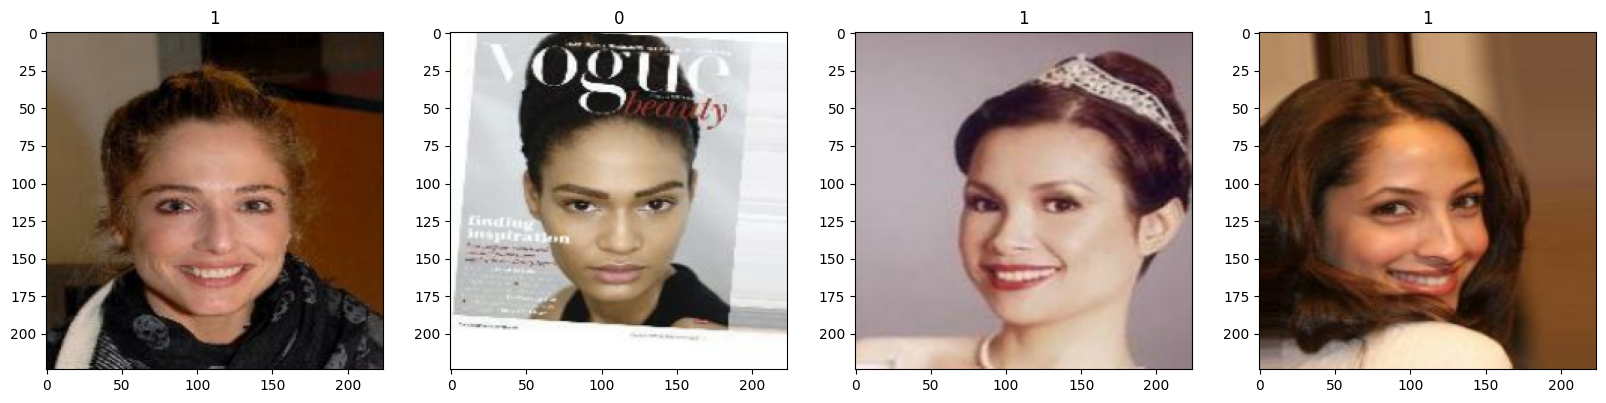

In [ ]:
data_iterator = data.as_numpy_iterator()
#getting a batch
batch = data_iterator.next()

#Plot a batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# **4 Preprocessing on the data**

4.1 Scale the data

In [ ]:
data = data.map(lambda x,y: (x/255, y))

# 5. Split the data into train, validate and test sets

In [ ]:
train_size = int(len(data)*.8)        #80%
val_size = int(len(data)*.1)          #10%
test_size = int(len(data)*.1)         #10%

train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Re-plotting the images after scaling

In [ ]:
scaled_iterator = data.as_numpy_iterator()
batch = scaled_iterator.next()
batch[0].max()

1.0

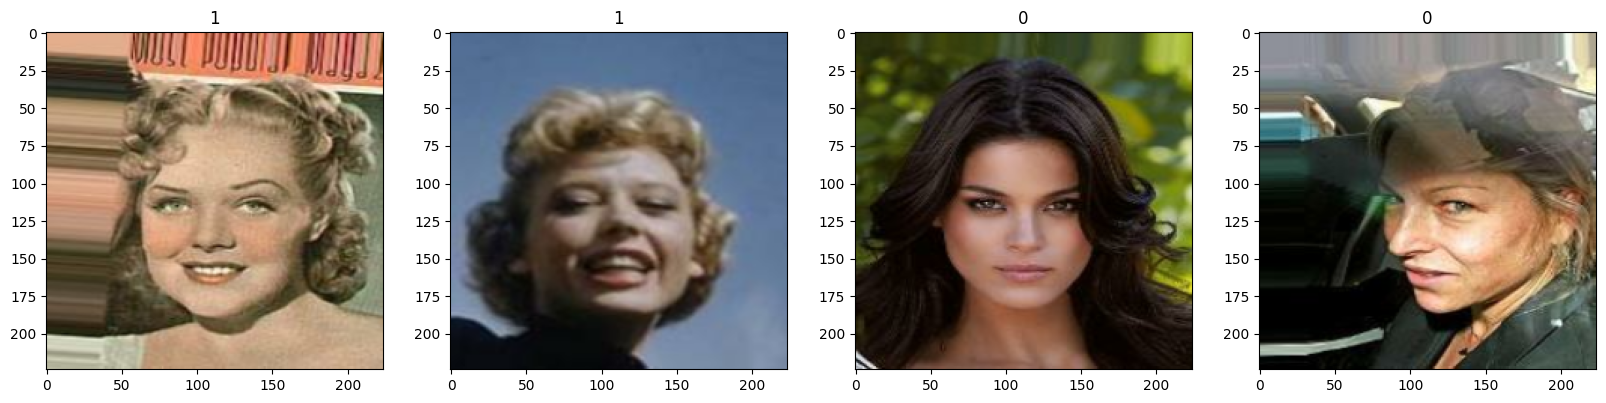

In [ ]:
data_iterator = data.as_numpy_iterator()
#getting a batch
batch = data_iterator.next()

#Plot a batch
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

# 6.  Bulding model**

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
model = Sequential()


model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])


In [ ]:
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 111, 111, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 54, 54, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 52, 52, 16)        4624      
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 26, 26, 16)       

# 7. Train the model

In [ ]:
logdir='logs'


In [ ]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)


In [ ]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback],verbose=2)

Epoch 1/20
50/50 - 79s - loss: 0.5503 - accuracy: 0.7206 - val_loss: 0.7344 - val_accuracy: 0.5885 - 79s/epoch - 2s/step
Epoch 2/20
50/50 - 78s - loss: 0.3643 - accuracy: 0.8388 - val_loss: 0.2697 - val_accuracy: 0.8854 - 78s/epoch - 2s/step
Epoch 3/20
50/50 - 80s - loss: 0.2703 - accuracy: 0.8881 - val_loss: 0.5181 - val_accuracy: 0.7917 - 80s/epoch - 2s/step
Epoch 4/20
50/50 - 79s - loss: 0.1973 - accuracy: 0.9206 - val_loss: 0.3313 - val_accuracy: 0.8854 - 79s/epoch - 2s/step
Epoch 5/20
50/50 - 79s - loss: 0.1598 - accuracy: 0.9400 - val_loss: 0.2706 - val_accuracy: 0.9010 - 79s/epoch - 2s/step
Epoch 6/20
50/50 - 79s - loss: 0.0995 - accuracy: 0.9631 - val_loss: 0.2203 - val_accuracy: 0.9115 - 79s/epoch - 2s/step
Epoch 7/20
50/50 - 79s - loss: 0.0706 - accuracy: 0.9769 - val_loss: 0.2548 - val_accuracy: 0.9219 - 79s/epoch - 2s/step
Epoch 8/20
50/50 - 78s - loss: 0.0585 - accuracy: 0.9800 - val_loss: 0.3913 - val_accuracy: 0.9010 - 78s/epoch - 2s/step
Epoch 9/20
50/50 - 80s - loss: 0

# 8. Plot Performance

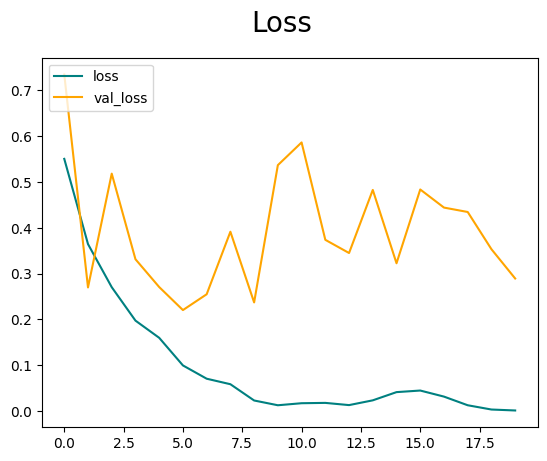

In [ ]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

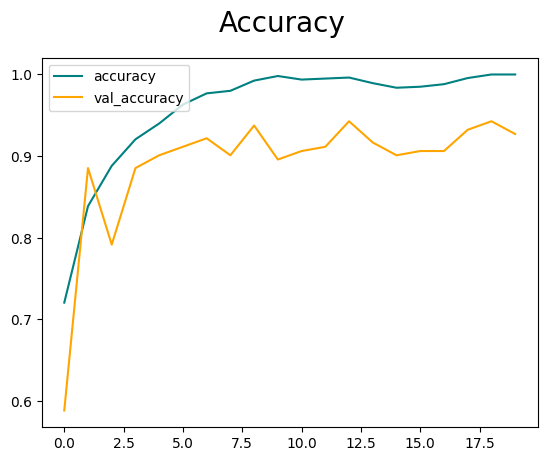

In [ ]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate Model

In [ ]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy


In [ ]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [ ]:
for batch in test.as_numpy_iterator():
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 360ms/step


In [ ]:
print(pre.result(), re.result(), acc.result())


tf.Tensor(0.90625, shape=(), dtype=float32) tf.Tensor(0.8969072, shape=(), dtype=float32) tf.Tensor(0.9010417, shape=(), dtype=float32)
